# Predict whether a person would have survived on the Titanic

Load Data

In [100]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic (2).csv


In [101]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['titanic.csv']))

In [102]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Pengecekan missing value

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [104]:
pd.isnull(df).sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

Pengecekan korelasi antar variable

In [105]:
df.corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000


In [106]:
import seaborn as sns

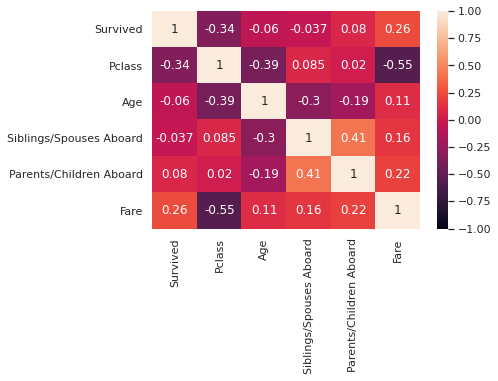

In [107]:
y_feat = df.corr()
sns.heatmap(y_feat, vmin = -1, vmax = 1, xticklabels = y_feat.columns, yticklabels = y_feat.columns, annot=True);

Normalisasi Data Numerikal

In [108]:
from sklearn.preprocessing import MinMaxScaler

def normalisasi(data):
  scaler = MinMaxScaler()
  data_num = data[['Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]
  data_m = scaler.fit_transform(data_num)
  data_m = pd.DataFrame(data_m, columns=['Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare'])
  return data_m

Normalisasi Data Kategorikal

In [109]:
df['Sex'] = df['Sex'].map({'male':1,'female':0})

In [110]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500


Memilih variabel yang akan digunakan

In [111]:
data = pd.DataFrame(df, columns=['Age','Pclass', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'Sex', 'Survived'])
data.head()

,Age,Pclass,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex,Survived
0,22.0,3,1,0,7.2500,1,0
1,38.0,1,1,0,71.2833,0,1
2,26.0,3,0,0,7.9250,0,1
3,35.0,1,1,0,53.1000,0,1
4,35.0,3,0,0,8.0500,1,0


Split Data

In [112]:
X = data.drop(['Survived'], axis=1)
y = data['Survived']

In [113]:
X = X.values
y = y.values

### Classification

Decission Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier
model_idt = DecisionTreeClassifier(criterion = 'entropy')

In [115]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score, classification_report
import statistics

kf = KFold(n_splits=10, random_state=45)
kf.get_n_splits(X)
print(kf)

# save our score
scoring = []
fscore = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_idt.fit(X_train,y_train)
    pred = model_idt.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Decision Tree : ", hasil)
    print(classification_report(y_test, pred))
    scoring.append(hasil)
    fscore.append(f1_score(y_test, pred))
scoring = np.array(scoring)
print("Scoring:", scoring.mean())
print("F-score:", statistics.mean(fscore))

KFold(n_splits=10, random_state=45, shuffle=False)
Score in Decision Tree :  0.7191011235955056
              precision    recall  f1-score   support

           0       0.71      0.84      0.77        50
           1       0.73      0.56      0.64        39

    accuracy                           0.72        89
   macro avg       0.72      0.70      0.70        89
weighted avg       0.72      0.72      0.71        89

Score in Decision Tree :  0.7303370786516854
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        69
           1       0.42      0.50      0.45        20

    accuracy                           0.73        89
   macro avg       0.63      0.65      0.64        89
weighted avg       0.75      0.73      0.74        89

Score in Decision Tree :  0.7865168539325843
              precision    recall  f1-score   support

           0       0.79      0.89      0.83        54
           1       0.79      0.63      0.70        

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

kf = KFold(n_splits=5, random_state=30)
kf.get_n_splits(X)
print(kf)

# save our score
scoring = []
fscore = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf.fit(X_train,y_train)
    pred = rf.predict(X_test)
    hasil = accuracy_score(y_test, pred)
    print("Score in Random Forest : ", hasil)
    print(classification_report(y_test, pred))
    scoring.append(hasil)
    fscore.append(f1_score(y_test, pred))
scoring = np.array(scoring)
print("Scoring:", scoring.mean())
print("F-score:", statistics.mean(fscore))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KFold(n_splits=5, random_state=30, shuffle=False)
Score in Random Forest :  0.7640449438202247
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       119
           1       0.63      0.71      0.67        59

    accuracy                           0.76       178
   macro avg       0.74      0.75      0.74       178
weighted avg       0.77      0.76      0.77       178

Score in Random Forest :  0.8089887640449438
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.83      0.72      0.77        79

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

Score in Random Forest :  0.8587570621468926
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       107
           1       0.80      0.86      0.83        7

### Data Visualization

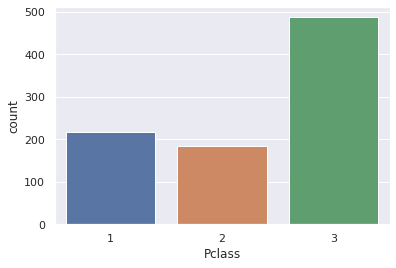

In [117]:
import seaborn as sns
sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="Pclass", data=df)

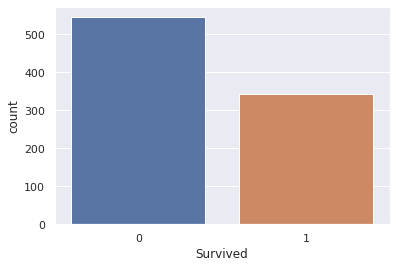

In [118]:
import seaborn as sns
sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="Survived", data=df)

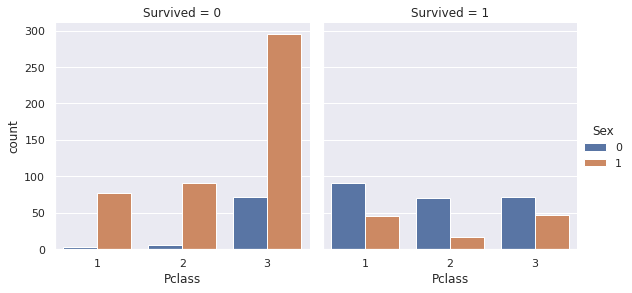

In [119]:
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=df, kind="count",
                height=4, aspect=1);

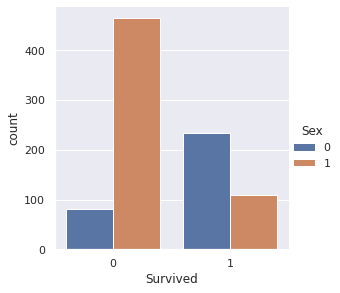

In [120]:
g = sns.catplot(x="Survived", hue="Sex",
                data=df, kind="count",
                height=4, aspect=1);
#Male = 1 Female = 0

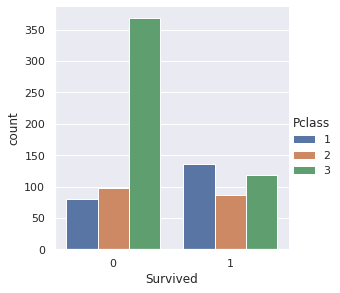

In [121]:
g = sns.catplot(x="Survived", hue="Pclass",
                data=df, kind="count",
                height=4, aspect=1);
#Male = 1 Female = 0

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


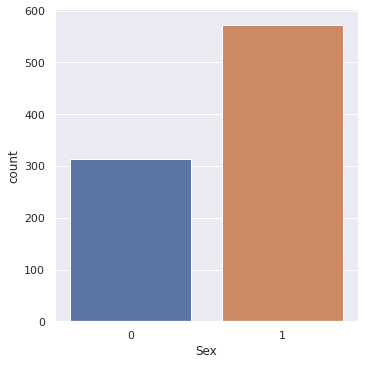

In [122]:
sns.factorplot('Sex',data=df,kind='count')

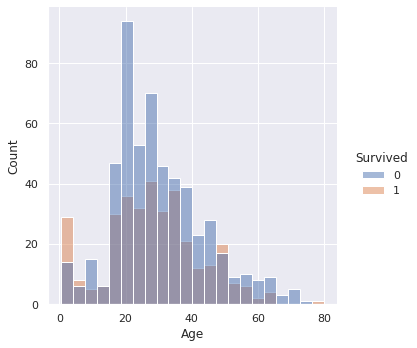

In [123]:
sns.displot(df, x="Age", hue="Survived")

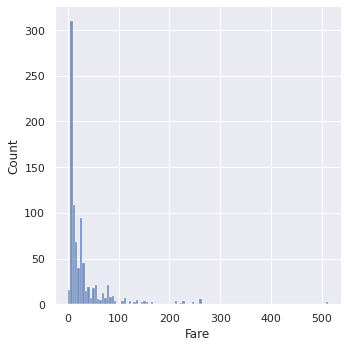

In [124]:
sns.displot(df, x="Fare")